# Stock price Prediction using LSTM network

In [87]:
#import modules
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import MaxPooling1D
from keras.layers import Conv1D
import datetime

Data='./data/'

In [125]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [140]:
url='drive/MyDrive/tez_datas/inf_adjusted_dataset.csv'
dataset = pd.read_csv(url, header=0, index_col=0)
dataset

,S&P500_Adj,Dow Jones_Adj,NASDAQ_Adj,Russel 2000_Adj,VIX Volatility_Adj,DAX Index_Adj,Shenzhen Component Index_Adj,Nikkei 225_Adj,Hang Seng Index_Adj,Crude Oil_Adj,Silver_Adj,CNY-USD_Adj,EUR-USD_Adj,JPY-USD_Adj,HKD-USD_Adj,Dollar Index_Adj,Gold_Adj
Date,,,,,,,,,,,,,,,,,
2003-12-01,1094.518731,10124.748140,2035.187841,567.234679,17.152356,4676.314211,413.678921,97.466927,1640.825473,30.632861,5.569146,0.123718,1.223782,0.009369,0.131719,88.368196,411.881572
2003-12-02,1090.938931,10078.302632,2025.215541,566.222055,16.640956,4709.998903,412.765898,97.926070,1636.109626,31.481785,5.621309,0.123718,1.236460,0.009407,0.131814,87.625522,412.904372
2003-12-03,1089.005824,10098.533896,2004.943700,557.620334,17.009163,4805.577780,415.404917,97.523829,1629.170529,31.809080,5.592670,0.123719,1.239938,0.009444,0.131797,87.527804,413.108914
2003-12-04,1094.109586,10157.243016,2013.688690,556.556645,16.671639,4787.828499,417.003472,98.529549,1625.492514,31.972728,5.576306,0.123721,1.235639,0.009447,0.131697,87.586433,412.495228
2003-12-05,1085.702200,10087.548784,1982.002241,551.299438,17.479652,4788.643143,414.863176,98.587382,1623.195043,31.430644,5.596762,0.123722,1.246481,0.009504,0.131809,87.156470,415.665914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-19,3261.784631,28876.395450,9043.634794,1696.430749,12.720000,14944.798382,1495.931507,221.676387,3632.436635,62.297473,17.358221,0.145288,1.131157,0.009289,0.130661,95.248594,1504.216270
2019-12-20,3277.913442,28955.899425,9082.039256,1701.325465,12.730176,15079.342959,1485.081374,221.568281,3638.751600,61.503743,17.429453,0.145176,1.132176,0.009303,0.130555,95.561980,1500.654670
2019-12-23,3280.752586,29054.036212,9103.093838,1703.604879,12.831936,14996.650452,1460.696126,221.375182,3642.183877,61.585152,17.709293,0.145253,1.127485,0.009293,0.130514,95.523665,1508.592000


In [127]:
# or if you don't use colab
#dataset = pd.read_csv(Data + "inf_adjusted_dataset" header=0, index_col=0)["Gold_Adj"]
#dataset

## Visualizing the fetched data


In [128]:
data_prediction_days=dataset.tail(365)
data_train_days=dataset[0:len(dataset)-365]


In [131]:
data_prediction_days.index=pd.to_datetime(data_prediction_days.index)
data_train_days.index=pd.to_datetime(data_train_days.index)

In [132]:
train_fold=int(len(data_train_days)*0.7)
train_fold


1864

In [133]:
validation_dataset=dataset[train_fold:data_train_days.shape[0]]

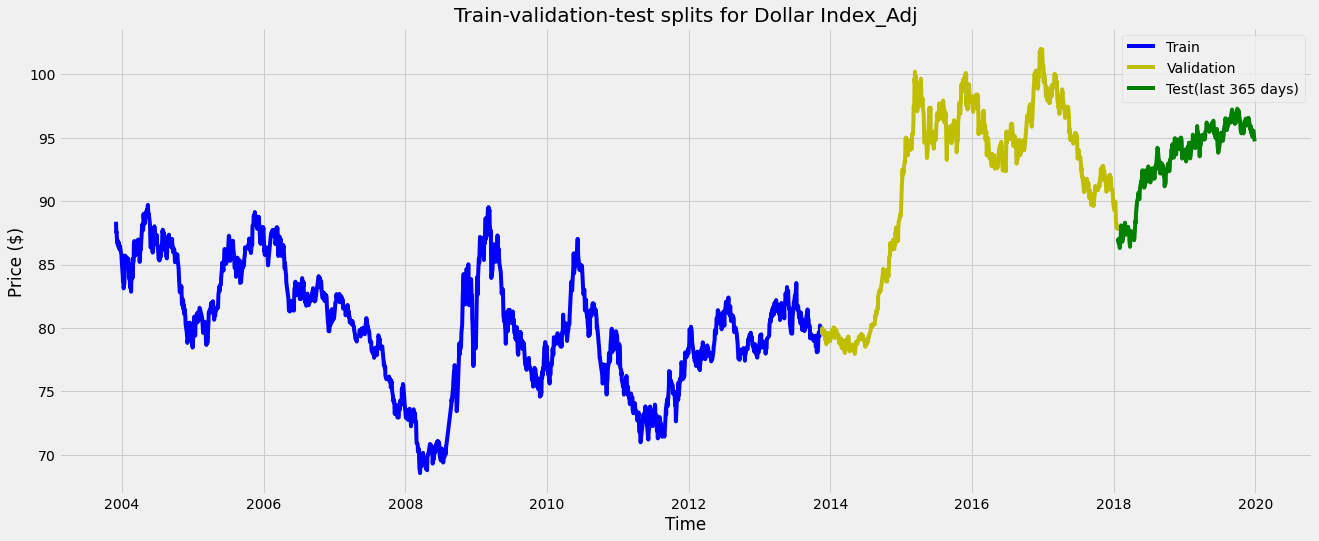

In [170]:
import matplotlib.dates as mdates
figs=plt.figure(figsize=(20,8))
ax=figs.add_subplot()
ax.plot(data_train_days[0:train_fold]["Dollar Index_Adj"],c='b',label='Train')
ax.plot(data_train_days[train_fold:]["Dollar Index_Adj"],c='y',label='Validation')
ax.plot(data_prediction_days["Dollar Index_Adj"],c='g',label='Test(last 365 days)')

plt.title('Train-validation-test splits for %s'% dataset.columns[-2])
plt.xlabel('Time')
plt.ylabel('Price ($)')

plt.legend()
plt.show() 

## Create train sets with applicable shape

In [171]:
sc = MinMaxScaler(feature_range = (0, 1))

def create_datasets(train_set,lb):
  dataset_scaled = sc.fit_transform(train_set)
  X_train = []
  y_train = []
 

  for x in range(lb, len(dataset_scaled)):
      X_train.append(dataset_scaled[x - lb:x,:])
      y_train.append(dataset_scaled[x, 15])
  
  X_train, y_train = np.array(X_train), np.array(y_train)
  X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 17))
  return X_train,y_train


In [172]:
data_train=pd.DataFrame(data_train_days)
data_test=pd.DataFrame(data_prediction_days)
lb=30
train_set = data_train
X_train,y_train=create_datasets(train_set,lb)


In [173]:
X_train.shape

(2633, 30, 17)

In [174]:
y_train.shape

(2633,)

In [175]:
data_valid=pd.DataFrame(validation_dataset)
X_valid,y_valid=create_datasets(data_valid,lb)

In [176]:
X_valid.shape

(769, 30, 17)

In [177]:
from keras.utils.vis_utils import plot_model


#Defining the LSTM Recurrent Mode
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True,input_shape = (X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))
model.summary()
#plot_model(model, to_file='model_plot.png', show_shapes=True,show_layer_names=True,expand_nested=True)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_32 (LSTM)              (None, 30, 50)            13600     
                                                                 
 dropout_32 (Dropout)        (None, 30, 50)            0         
                                                                 
 lstm_33 (LSTM)              (None, 30, 50)            20200     
                                                                 
 dropout_33 (Dropout)        (None, 30, 50)            0         
                                                                 
 lstm_34 (LSTM)              (None, 30, 50)            20200     
                                                                 
 dropout_34 (Dropout)        (None, 30, 50)            0         
                                                                 
 lstm_35 (LSTM)              (None, 50)               

In [178]:
#Compiling and fitting the model
model.compile(optimizer = 'adam', loss ='mean_squared_error')
history=model.fit(X_train, y_train ,validation_data=(X_valid,y_valid),epochs = 20, batch_size = 32)

Epoch 1/20
83/83 [==============================] - 10s 58ms/step - loss: 0.0224 - val_loss: 0.0146
Epoch 2/20
83/83 [==============================] - 3s 40ms/step - loss: 0.0056 - val_loss: 0.0104
Epoch 3/20
83/83 [==============================] - 3s 40ms/step - loss: 0.0051 - val_loss: 0.0133
Epoch 4/20
83/83 [==============================] - 3s 40ms/step - loss: 0.0047 - val_loss: 0.0072
Epoch 5/20
83/83 [==============================] - 3s 40ms/step - loss: 0.0040 - val_loss: 0.0100
Epoch 6/20
83/83 [==============================] - 3s 41ms/step - loss: 0.0038 - val_loss: 0.0049
Epoch 7/20
83/83 [==============================] - 3s 41ms/step - loss: 0.0042 - val_loss: 0.0066
Epoch 8/20
83/83 [==============================] - 4s 42ms/step - loss: 0.0035 - val_loss: 0.0088
Epoch 9/20
83/83 [==============================] - 4s 52ms/step - loss: 0.0033 - val_loss: 0.0052
Epoch 10/20
83/83 [==============================] - 3s 41ms/step - loss: 0.0030 - val_loss: 0.0115
Epoch 11

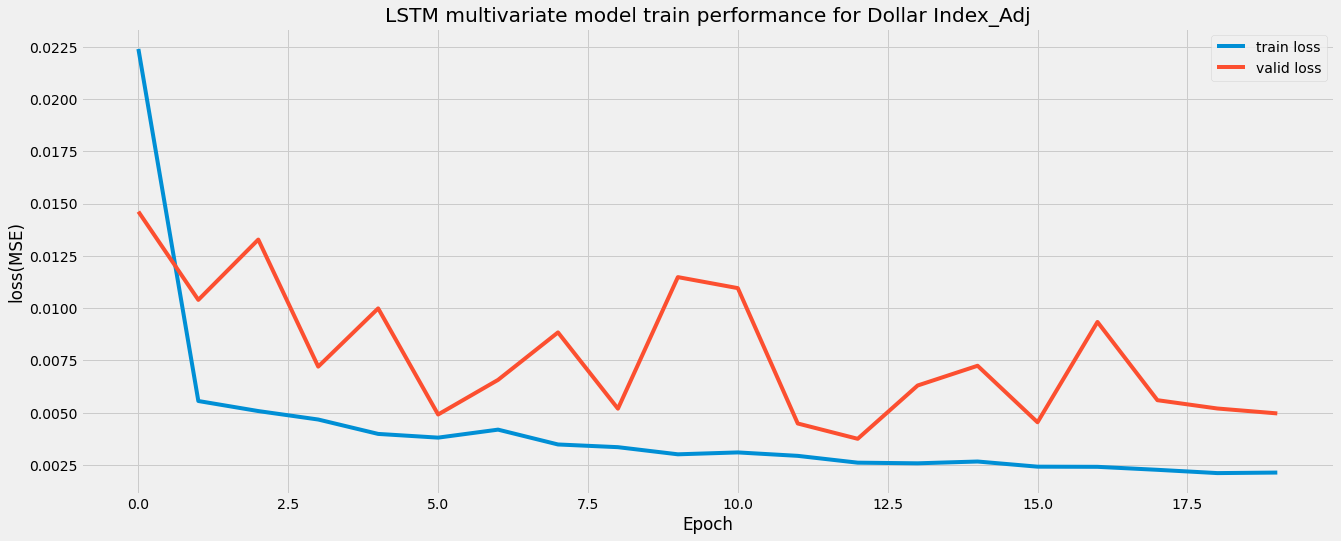

In [180]:
plt.figure(figsize=(20,8))
plt.style.use('fivethirtyeight')

plt.plot(history.history['loss'], label = 'train loss')
plt.plot(history.history['val_loss'],  label = 'valid loss')
plt.title('LSTM multivariate model train performance for %s' % dataset.columns[15])
plt.xlabel('Epoch')
plt.ylabel('loss(MSE)')
plt.legend()
plt.show()

In [182]:
#testdata=pd.DataFrame(data_prediction_days)
real_stock_price = data_prediction_days["Dollar Index_Adj"]
dataset_total = pd.concat((data_train, data_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(data_test) - lb:].values

inputs = inputs.reshape(-17,17)
inputs = sc.transform(inputs)
X_test = []
y_test=[]
for i in range(lb, len(inputs)):
    X_test.append(inputs[i-lb:i, :])
    #y_test.append(inputs[i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 17))
print(X_test.shape)


(365, 30, 17)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


In [183]:
predicted_price = model.predict(X_test)
sc1=MinMaxScaler((0,1))
gold=train_set["Dollar Index_Adj"].values.reshape(-1,1)
sc1.fit(gold)

predicted_price = sc1.inverse_transform(predicted_price)

## Evaluate metrics

In [184]:
from cmath import sqrt

from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
r2=r2_score(real_stock_price,predicted_price) 
rmse=sqrt(mean_squared_error(real_stock_price,predicted_price))/(max(real_stock_price)-min(real_stock_price))
mae=mean_absolute_error(real_stock_price,predicted_price)
print("RMSE: %s r2 score: %.5f, mae score : %.5f" % (rmse,r2,mae))

RMSE: (0.3898964995228378+0j) r2 score: -1.20805, mae score : 3.52902


## Accuracy calculalation 
### (if prediction is greater/lower than %20 of real value, acceptable)

In [185]:
percent=0.2
vector=[]
for i in range(0,predicted_price.shape[0]):
    if abs(predicted_price[i] - real_stock_price[i]) < real_stock_price[i]*percent:
        vector.append(True)
    else:
        vector.append(False)
print("Accuracy: %" ,vector.count(True)/len(vector)*100)

Accuracy: % 100.0


## predictions & real stocs

In [186]:
predicted_price=np.squeeze(predicted_price)
real_stock_price=np.squeeze(real_stock_price)
df=pd.DataFrame({
    "pred":predicted_price,
    "real":real_stock_price,
    

})
df["% diff"]=(abs(df["pred"]-df["real"])/df["real"])*100
df
#print(df["% diff"].mean())

,pred,real,% diff
Date,,,
2018-01-24,81.059372,86.794628,6.607846
2018-01-25,80.787865,87.005245,7.145983
2018-01-26,80.499657,86.677613,7.127511
2018-01-30,80.204117,86.782925,7.580764
2018-01-31,79.938477,86.739048,7.840265
...,...,...,...
2019-12-19,95.862267,95.248594,0.644285
2019-12-20,95.633392,95.561980,0.074729
2019-12-23,95.462479,95.523665,0.064053


In [189]:
predicted=pd.DataFrame(predicted_price,index=real_stock_price.index)

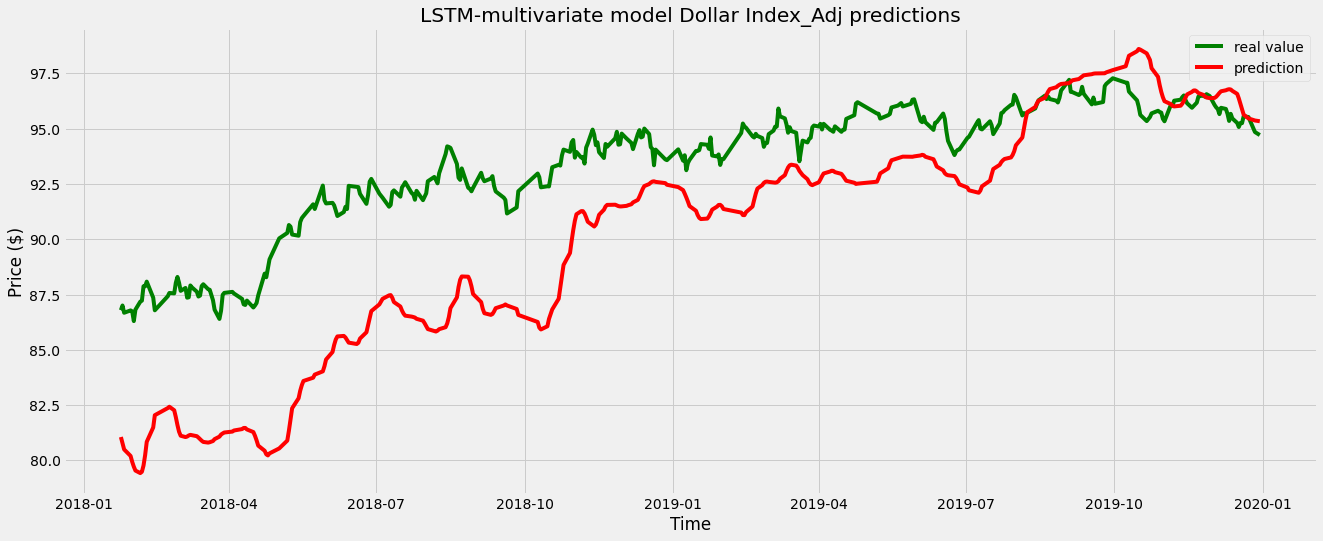

In [190]:
#Visualizing the prediction
plt.figure(figsize=(20,8))
plt.plot(real_stock_price, color = 'green', label = 'real value')
plt.plot(predicted, color = 'red', label = 'prediction')
plt.title('LSTM-multivariate model %s predictions' % dataset.columns[-2]) 
plt.xlabel('Time')
plt.ylabel('Price ($)')
plt.legend()
plt.show()